# 1-2. BeautifulSoup로 스크레이핑 하기

* BeautifulSoup은 웹 페이지를 파싱하고 원하는 부분을 추출하는 데 사용됩니다

In [18]:
# 라이브러리 읽어 들이기 --- (※1)  
from bs4 import BeautifulSoup

# 분석하고 싶은 HTML --- (※2)
html = """
<html><body>
<h1>스크레이핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body></html>
"""

# HTML 분석하기 --- (※3)
soup = BeautifulSoup(html, 'html.parser')

# 원하는 부분 추출하기 --- (※4)  
h1 = soup.html.body.h1
p1 = soup.html.body.p
p2 = p1.next_sibling.next_sibling

# 요소의 글자 출력하기 --- (※5) 
print("h1 = " + h1.string)  
print("p1 = " + p1.string)  
print("p2 = " + p2.string)

h1 = 스크레이핑이란?
p1 = 웹 페이지를 분석하는 것
p2 = 원하는 부분을 추출하는 것


## id로 요소를 찾는 방법
* id 속성을 지정해서 요소를 찾는 find() 메서드를 제공

In [22]:
from bs4 import BeautifulSoup

html = """
<html><body>
<h1 id="title">스크레이핑이란?</h1>
<p id="body">웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body></html>
"""

# HTML 분석하기 --- (※1)
soup = BeautifulSoup(html, 'html.parser')

# find() 메서드로 원하는 부분 추출하기 --- (※2)  
title = soup.find(id="title")
body  = soup.find(id="body")

# 텍스트 부분 출력하기  
print("#title=" + title.string)  
print("#body="  + body.string)


#title=스크레이핑이란?
#body=웹 페이지를 분석하는 것


## 여러개의 요소 추출하기 - find all() 메서드
* 여러  개의  태그를  한  번에  추출하고  싶을  때는  find_all() 메서드를  사용

* HTML 내부에 있는 여러 개의 <a> 태그를 추출하는 프로그램
* <a> 태그는 하이퍼링크  태그이므로, 링크 대상은 href 속성으로 지정하고 링크를 설명하는 텍스트는 태그 내부에  입력
* 설명 글자와 링크 대상 URL을 추출하고 출력하는 예

> attrs = attribute(속성)

In [31]:
from bs4 import BeautifulSoup
html = """
<html><body>
<ul>
<li><a href="http://www.naver.com">naver</a></li>
<li><a href="http://www.daum.net">daum</a></li>
</ul>
</body></html>
"""

# HTML 분석하기 --- (※1)
soup = BeautifulSoup(html, 'html.parser')

# find_all() 메서드로 추출하기 --- (※2)  
links = soup.find_all("a")

# 링크 목록 출력하기 --- (※3)  
for a in links:
    href = a.attrs['href']  
    text = a.string  
    print(text,">",href)


naver > http://www.naver.com
daum > http://www.daum.net


## DOM 요소의 속성에 대해 

* DOM 요소의 속성을 추출하는 방법을 확인
* 파이썬의 대화형 실행 환경인 REPL을 사용해 동작을 확인
* REPL을 실행하려면 명령줄에 “python3”라고 입력

* DOM(Document Object Model)이란 XML 또는 HTML의 요소에 접근하는 구조를 나타냄
* DOM 요소의 속성이란 태그 이름 뒤에 있는 각 속성을 말함
* 예를 들어, <a> 태그라면 href 등이 속성


In [36]:
 # 코드를 쉽게 볼 수 있게 줄바꿈했습니다. 실제 REPL은 따로 줄바꿈되지 않습니다.
 from bs4 import BeautifulSoup
 soup = BeautifulSoup(

"<p><a href='a.html'>test</a></p>",
"html.parser")

 # 분석이 제대로 됐는지 확인하기 --- (※1)
 soup.prettify()
'<p>\n <a href="a.html">\n  test\n </a>\n</p>'


 # <a> 태그를 변수 a에 할당
 a = soup.p.a


 # attrs 속성의 자료형 확인 --- (※2)
 type(a.attrs)


 # href 속성이 있는지 확인
 'href' in a.attrs
True

 # href 속성값 확인
 a['href']
'a.html'


'a.html'

## urlopen() 과 BeautifulSoup 조합하기 

* open() 함수 또는 urllib.request.urlopen() 함수의 리턴 값을 지정해도 됨
* urlopen()을 사용해 “기상청 RSS”에서 특정 내용을 추출하기


In [40]:
from bs4 import BeautifulSoup
import urllib.request as req

url = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

# urlopen()으로 데이터 가져오기 --- (※1)  
res = req.urlopen(url)

# BeautifulSoup으로 분석하기 --- (※2)  
soup = BeautifulSoup(res, "html.parser")

# 원하는 데이터 추출하기 --- (※3)  
title = soup.find("title").string  
wf = soup.find("wf").string 
print(title)
print(wf)


기상청 육상 중기예보
○ (강수) 18일(목) 오후부터 19일(금) 오전 사이 제주도에 비가 오겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 12~19도, 낮 기온은 21~29도로 평년(최저기온 11~16도, 최고기온 22~27도)과 비슷하거나 조금 높겠습니다.<br />○ (주말전망) 20일(토) 오전은 전국이 대체로 맑겠으며, 오후는 가끔 구름많겠습니다. 21일(일)은 전국이 구름많겠습니다. 아침 기온은 13~18도, 낮 기온은 21~29도가 되겠습니다. <br /><br />* 18일(목)~19일(금)은 기압골의 발달 정도와 이동 속도에 따라 강수시점과 구역이 변경될 가능성이 있으니, 앞으로 발표되는 최신 예보를 참고하기 바랍니다.


## CSS 선택자 사용하기

* BeautifulSoup는 jQuery처럼 CSS 선택자를 지정해서 원하는 요소를 추출하는 기능도 제공

> soup.select_one(<선택자>) CSS 선택자로 요소 하나를 추출합니다. = 리턴(값)  
> soup.select(<선택자>) CSS 선택자로 요소 여러 개를 리스트로 추출합니다. = 리턴(배열)



In [48]:
from bs4 import BeautifulSoup

# 분석 대상 HTML --- (※1)
html = """
<html><body>
<div id="meigen">
<h1>위키북스 도서</h1>
<ul class="items">
<li>유니티 게임 이펙트 입문</li>
<li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
<li>모던 웹사이트 디자인의 정석</li>
</ul>
</div>
</body></html>
"""

# HTML 분석하기 --- (※2)
soup = BeautifulSoup(html, 'html.parser')

# 필요한 부분을 CSS 쿼리로 추출하기
# 타이틀 부분 추출하기 --- (※3)
h1 = soup.select_one("div#meigen > h1").string  
print("h1 =", h1)
# 목록 부분 추출하기 --- (※4)
li_list = soup.select("div#meigen > ul.items > li")  

for li in li_list:
    print("li =", li.string)



h1 = 위키북스 도서
li = 유니티 게임 이펙트 입문
li = 스위프트로 시작하는 아이폰 앱 개발 교과서
li = 모던 웹사이트 디자인의 정석


## 네이버 금융에서 환율 정보 추출하기 

* 다양한 금융 정보가 공개돼 있는 “네이버 금융”에서 원/달러 환율 정보를 추출

* 네이버 금융의 시장 지표 페이지 : http://finance.naver.com/marketindex/


In [49]:
from bs4 import BeautifulSoup
import urllib.request as req

# HTML 가져오기
url = "http://finance.naver.com/marketindex/"  
res = req.urlopen(url)

# HTML 분석하기
soup = BeautifulSoup(res, "html.parser")

# 원하는 데이터 추출하기 --- (※1)
price = soup.select_one("div.head_info > span.value").string  
print("usd/krw =", price)


usd/krw = 1,339.60


## 유가, 금시세(휘발유 정보 )
* f12 -> copy -> copyselector 사용
* #oilGoldList > li:nth-child(2) > a.head.gasoline > div > span.value 변경

In [52]:
from bs4 import BeautifulSoup
import urllib.request as req

# HTML 가져오기
url = "http://finance.naver.com/marketindex/" 
res = req.urlopen(url)

# HTML 분석하기
soup = BeautifulSoup(res, "html.parser")

# 원하는 데이터 추출하기 --- (※1)
price = soup.select_one("#oilGoldList > li:nth-child(2) > a.head.gasoline > div > span.value").string  
print("휘발유 =", price,"원")


휘발유 = 1632.88 원


# 1-3 CSS 선택자 (위키 문헌 - 윤동주)

> HTML의 구조를 확인하는 방법  
> CSS 선택자  
> 웹브라우저(구글크롬)

mw-content-text > ul:nth-child(7) > li > b > a

* nth-child(n)은 n번째에 있는 요소를 의미
* nth-child(7)은 7번째에 있는 태그라는 의미

In [68]:
from bs4 import BeautifulSoup
import urllib.request as req


# 뒤의 인코딩 부분은 "저자:윤동주"라는 의미입니다.
# 따로 입력하지 말고 위키 문헌 홈페이지에 들어간 뒤에 주소를 복사해서 사용하세요.
url ="https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC" 
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

# #mw-content-text 바로 아래에 있는
# ul 태그 바로 아래에 있는
# li 태그 아래에 있는
# a 태그를 모두 선택합니다.
a_list = soup.select("#mw-content-text > div.mw-parser-output > ul:nth-child(6) > li > b > a")

for a in a_list:  
    name = a.string  
    print("-", name)
    

- 하늘과 바람과 별과 시


In [67]:
from bs4 import BeautifulSoup
import urllib.request as req


# 뒤의 인코딩 부분은 "저자:윤동주"라는 의미입니다.
# 따로 입력하지 말고 위키 문헌 홈페이지에 들어간 뒤에 주소를 복사해서 사용하세요.
url ="https://ko.wikisource.org/wiki/%EC%A0%80%EC%9E%90:%EC%9C%A4%EB%8F%99%EC%A3%BC" 
res = req.urlopen(url)
soup = BeautifulSoup(res, "html.parser")

# #mw-content-text 바로 아래에 있는
# ul 태그 바로 아래에 있는
# li 태그 아래에 있는
# a 태그를 모두 선택합니다.

b_list = soup.select("#mw-content-text > div > ul > li > a")


    
for b in b_list:  
    name2 = b.string  
    print("-", name2)

- 증보판
- 흰 그림자
- 사랑스런 추억
- 흐르는 거리
- 봄
- 참회록
- 간(肝)
- 위로
- 팔복
- 못자는밤
- 달같이
- 고추밭
- 아우의 인상화
- 사랑의 전당
- 이적
- 비오는 밤
- 산골물
- 유언
- 창
- 바다
- 비로봉
- 산협의 오후
- 명상
- 소낙비
- 한난계
- 풍경
- 달밤
- 장
- 밤
- 황혼이 바다가 되어
- 아침
- 빨래
- 꿈은 깨어지고
- 산림
- 이런날
- 산상
- 양지쪽
- 닭
- 가슴 1
- 가슴 2
- 비둘기
- 황혼
- 남쪽 하늘
- 창공
- 거리에서
- 삶과 죽음
- 초한대
- 산울림
- 해바라기 얼굴
- 귀뚜라미와 나와
- 애기의 새벽
- 햇빛·바람
- 반디불
- 둘 다
- 거짓부리
- 눈
- 참새
- 버선본
- 편지
- 봄
- 무얼 먹구 사나
- 굴뚝
- 햇비
- 빗자루
- 기왓장 내외
- 오줌싸개 지도
- 병아리
- 조개껍질
- 겨울
- 트루게네프의 언덕
- 달을 쏘다
- 별똥 떨어진 데
- 화원에 꽃이 핀다
- 종시


## CSS 선택자로 과일과 야채 선택해보기 

In [104]:
html = """
<html>
<body>
<div id="main-goods" role="page">
<h1>과일과 야채</h1>
<ul id="fr-list">
<li class="red green" data-lo="ko">사과</li>
<li class="purple" data-lo="us">포도</li>
<li class="yellow" data-lo="us">레몬</li>
<li class="yellow" data-lo="ko">오렌지</li>
</ul>
<ul id="ve-list">
<li class="white green" data-lo="ko">무</li>
<li class="red green" data-lo="us">파프리카</li>
<li class="black" data-lo="ko">가지</li>
<li class="black" data-lo="us">아보카도</li>
<li class="white" data-lo="cn">연근</li>
</ul>
</div>
</body>
</html>
"""

from bs4 import BeautifulSoup
soup = BeautifulSoup(html,"html.parser")



# CSS 선택자로 추출하기
print(soup.select("li:nth-of-type(4)")[0].string) 			#(※1) 오렌지추출
print(soup.select("li:nth-of-type(4)")[1].string) 			#(※1) 
print(soup.select_one("#ve-list > li:nth-of-type(4)").string)  		#(※2)
print(soup.select("#ve-list > li[data-lo='us']")[1].string)			#(※3)
print(soup.select("#ve-list > li.black")[1].string)				#(※4)

# find 메서드로 추출하기 ---- (※5)
cond = {"data-lo":"us", "class":"black"}  
print(soup.find("li", cond).string)

# find 메서드를 연속적으로 사용하기 --- (※6)  
print(soup.find(id="ve-list")
    .find("li", cond).string)



오렌지
아보카도
아보카도
아보카도
아보카도
아보카도
아보카도


## 정규 표현식과 함께 조합하기 
> r"^https:// (https://로 시작하는 데이터 추출)

In [107]:
from bs4 import BeautifulSoup
import re # 정규 표현식을 사용할 때 --- (※1)

html = """
<ul>
<li><a href="hoge.html">hoge</li>
<li><a href="https://example.com/fuga">fuga*</li>
<li><a href="https://example.com/foo">foo*</li>
<li><a href="http://example.com/aaa">aaa</li>
<li><a href="https://today1700.com/aaa">aaa</li>
</ul>
"""
soup = BeautifulSoup(html, "html.parser")
# 정규 표현식으로 href에서 https인 것 추출하기 --- (※2)  
li = soup.find_all(href=re.compile(r"^https://"))
for e in li: print(e.attrs['href'])


https://example.com/fuga
https://example.com/foo
https://today1700.com/aaa


# 1-4 링크에 있는 것을 한꺼번에 내려받기

* 상대경로를 절대 경로로 변경하는 방법
* 링크에 있는 것을 추출하기 위한 재귀처리

## 한꺼번에 다운받는 데 필요한 처리 내용

* <a> 태그의 링크 대상이 상대 경로일 수 있음
* 링크 대상이 HTML일 경우, HTML의 내용에 추가적인 처리가 필요
* 링크를 재귀적으로 다운받아야 함

## 상대  경로를  전개하는 방법
* 상대 경로를 전개할 때는 urllib.parse.urljoin()을 사용
    

In [108]:
from urllib.parse import urljoin

base = "http://example.com/html/a.html"

print( urljoin(base, "b.html") )  
print( urljoin(base, "sub/c.html") )  
print( urljoin(base, "../index.html") )
print( urljoin(base, "../img/hoge.png") )  
print( urljoin(base, "../css/hoge.css") )


http://example.com/html/b.html
http://example.com/html/sub/c.html
http://example.com/index.html
http://example.com/img/hoge.png
http://example.com/css/hoge.css


In [109]:
from urllib.parse import urljoin

base = "http://example.com/html/a.html"

print( urljoin(base, "/hoge.html") )
print( urljoin(base, "http://otherExample.com/wiki") )  
print( urljoin(base, "//anotherExample.org/test") )


http://example.com/hoge.html
http://otherExample.com/wiki
http://anotherExample.org/test


## 재귀적으로 HTML 페이지를 처리하는 방법
* “a.html”에서 “b.html”로 링크 이동하고, “b.html”에서 “c.html”로 링크 이동하는 경우
* “a.html”에서 링크를 통해 이동하는 페이지를 모두 다운로드하고, “c.html”을  다운받지 않으면 중간에 링크가 잘리는 문제가 발생
* “a.html”을 분석하면 “b.html”도 함께 분석. 또한 “c.html”에서 “d.html”로 링크를 통해 이동하는 경우가 있다면  “c.html”도 분석해야 함
* HTML을 다운로드하고 싶다면 재귀적으로 HTML을 분석해야 함

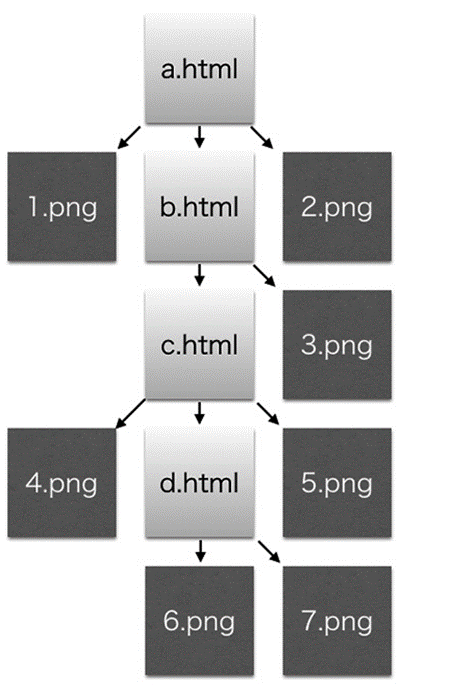